In [4]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [5]:
# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("data/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# ===============================
# 3. Basic Exploration
# ===============================
print(df.shape)
print(df['sentiment'].value_counts())

(50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
# Check missing values
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [8]:
# ===============================
# 4. Encode Sentiment Labels
# ===============================
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df = df[['review', 'label']]
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
# ===============================
# 5. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['label'], 
    test_size=0.2, 
    random_state=42,
    stratify=df['label']
)

print("Training size:", len(X_train))
print("Testing size:", len(X_test))

Training size: 40000
Testing size: 10000


In [10]:
# ===============================
# 6. Text Vectorization (TF-IDF)
# ===============================
tfidf = TfidfVectorizer(
    max_features=5000, 
    stop_words='english'
)

In [11]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
# ===============================
# 7. Model Training
# ===============================
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


Accuracy: 0.8894

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



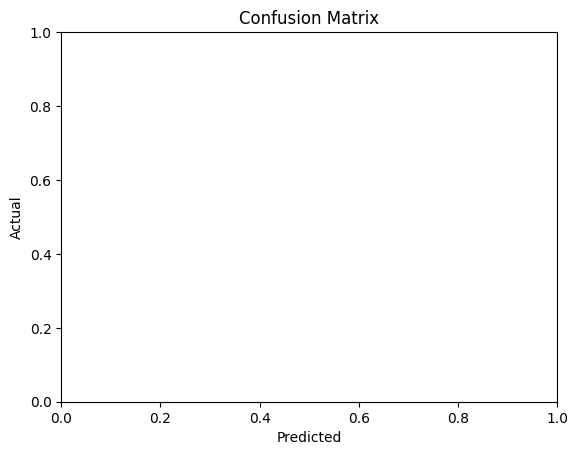

In [14]:
# ===============================
# 8. Model Evaluation
# ===============================
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# ===============================
# 9. Save Model + Vectorizer
# ===============================
joblib.dump(model, "artifacts/sentiment_model.pkl")
joblib.dump(tfidf, "artifacts/tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved!")

✅ Model and vectorizer saved!


In [16]:
# ===============================
# 10. Quick Testing
# ===============================
sample_reviews = [
    "I absolutely loved this movie! The story was touching.",
    "This was the worst film I have ever seen. Total waste of time."
]

sample_features = tfidf.transform(sample_reviews)
sample_preds = model.predict(sample_features)

for review, pred in zip(sample_reviews, sample_preds):
    print(f"Review: {review}\nSentiment: {'Positive' if pred==1 else 'Negative'}\n")

Review: I absolutely loved this movie! The story was touching.
Sentiment: Positive

Review: This was the worst film I have ever seen. Total waste of time.
Sentiment: Negative

